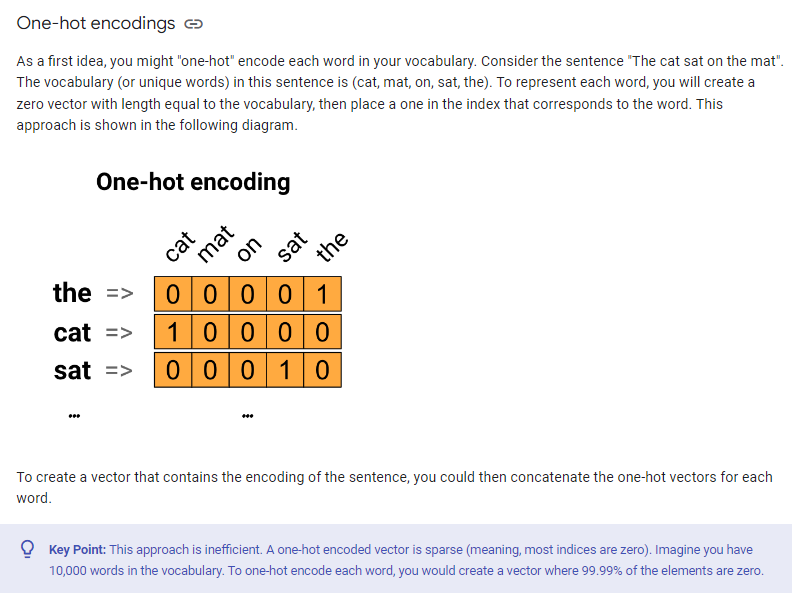

# **Using the below approch in the analysis**

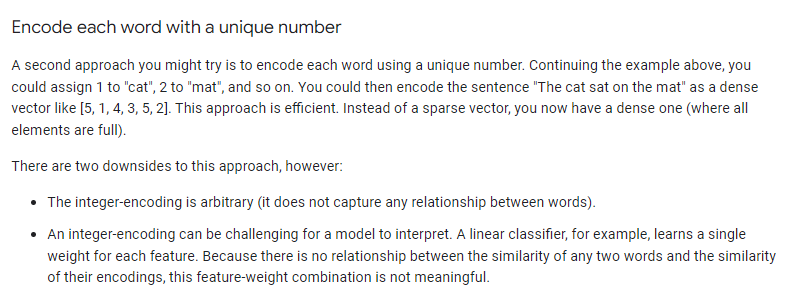

In [17]:
import numpy as np

docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

**`UNK and OOV is the most commonly used token for representing out-of-vocabulary words in many NLP tasks. It’s widely recognized and serves as a standard`**

**`The Tokenizer in Keras does not automatically convert capital letters to lowercase. It treats words with different cases as distinct tokens unless you preprocess the text yourself`**

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<nothing>')

In [19]:
tokenizer.fit_on_texts(docs)

In [20]:
# it shows the indices which are assigned to the unique words
tokenizer.word_index

{'<nothing>': 1,
 'india': 2,
 'jeetega': 3,
 'hip': 4,
 'ki': 5,
 'jai': 6,
 'kohli': 7,
 'sachin': 8,
 'dhoni': 9,
 'go': 10,
 'hurray': 11,
 'bhai': 12,
 'bharat': 13,
 'mata': 14,
 'modi': 15,
 'ji': 16,
 'inquilab': 17,
 'zindabad': 18}

In [36]:
print(f'Vocabulary size: {len(tokenizer.word_index)}')

Vocabulary size: 18


In [21]:
# to check how many times each specific word is repeated
tokenizer.word_counts

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 2),
             ('jai', 2),
             ('kohli', 2),
             ('sachin', 2),
             ('dhoni', 2),
             ('modi', 1),
             ('ji', 1),
             ('inquilab', 1),
             ('zindabad', 1)])

In [22]:
# to check total samples in our dataset
tokenizer.document_count

10

In [23]:
# docs is now transformed into a list of integers, where each integer represents a word in the document according to the vocabulary created by the tokenizer
# [10, 2] shows go india
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[10, 2],
 [2, 2],
 [4, 4, 11],
 [3, 12, 3, 2, 3],
 [13, 14, 5, 6],
 [7, 7],
 [8, 8],
 [9, 9],
 [15, 16, 5, 6],
 [17, 18]]

# **as the sequences are of variable length, so applying padding**

* Use padding='post' when you want to add padding at the end of the sequence, preserving the start.

* Use padding='pre' when you want to add padding at the beginning, preserving the end.

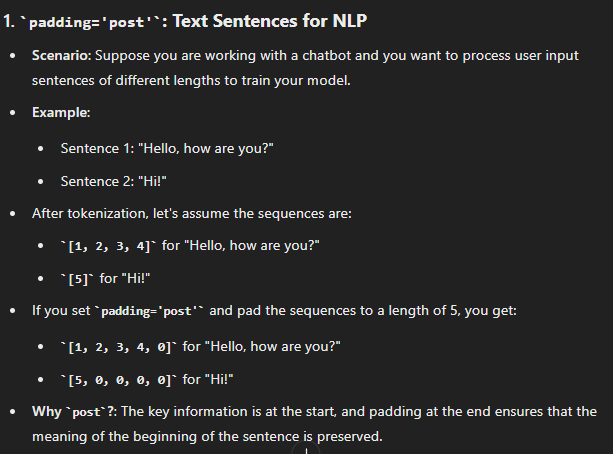

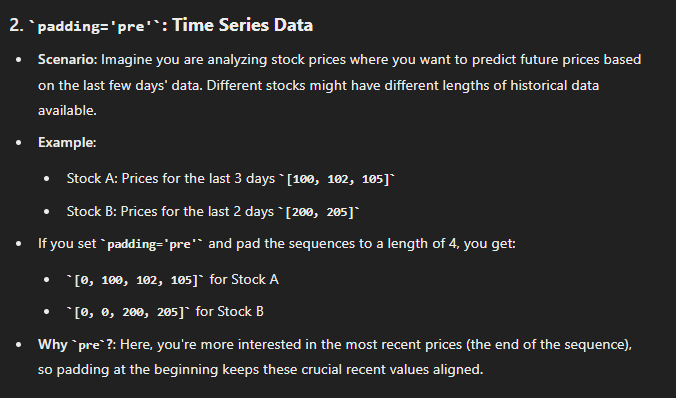

In [24]:
from keras.utils import pad_sequences

In [25]:
sequences = pad_sequences(sequences,padding='post')

In [26]:
sequences

array([[10,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 4,  4, 11,  0,  0],
       [ 3, 12,  3,  2,  3],
       [13, 14,  5,  6,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [ 9,  9,  0,  0,  0],
       [15, 16,  5,  6,  0],
       [17, 18,  0,  0,  0]], dtype=int32)

In [27]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

**This dataset is already preprocessed (integer encoded)**

In [28]:
(X_train,y_train), (X_test,y_test) = imdb.load_data()

In [29]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [30]:
# the lengths are different, so applying padding
print(len(X_train[0]))
print(len(X_train[1]))
print(len(X_train[2]))

218
189
141


In [31]:
# there's a parameter called maxlen, if we want to trim the length to a specific value
# X_train = pad_sequences(X_train,padding='post',maxlen=50)

X_train = pad_sequences(X_train,padding='post')
X_test = pad_sequences(X_test,padding='post')

In [32]:
print(X_train[0])

print(f'length after padding {len(X_train[0])}')

[ 1 14 22 ...  0  0  0]
length after padding 2494


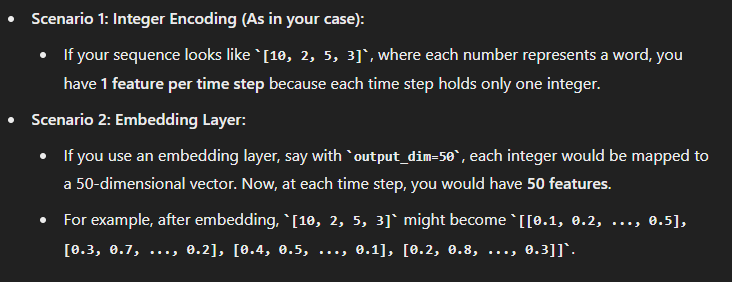

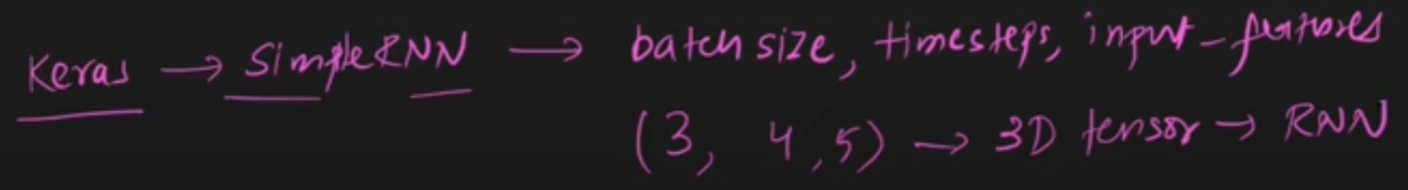

In [33]:
model = Sequential()

model.add(SimpleRNN(32,input_shape=(2494,1),return_sequences=False))  # input_shape(2494, 1), 2491 -> tells that each input sequence has 2494 time steps and at each time step, there is 1 feature (which corresponds to a single integer value representing a word
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test), batch_size = 512)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 48s 936ms/step - accuracy: 0.4978 - loss: 0.6949 - val_accuracy: 0.5001 - val_loss: 0.6932
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 47s 972ms/step - accuracy: 0.5026 - loss: 0.6932 - val_accuracy: 0.5016 - val_loss: 0.6933
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 46s 941ms/step - accuracy: 0.4924 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.4949 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 76s 953ms/step - accuracy: 0.4939 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
